In [42]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sy
from IPython.display import display, Math, Latex

# Problem 1:

In [43]:
def sigmoid(x: float, deriv: bool = False):
    if deriv:
        vals = sigmoid(x, deriv=False)*(1-sigmoid(x, deriv=False))
        return np.array([np.diag(val) for val in vals])
    else:
        return 1/(1 + np.exp(-x))

In [44]:
W1 = np.ones((4,3))
X = np.array([1, 2, 3, 4])
X@W1

array([10., 10., 10.])

In [45]:
H = np.array([2, 2, 2])
W = np.ones([3, 1])
H@W
sigmoid(H@W)

array([0.99752738])

In [46]:
-np.log(0.9)

0.10536051565782628

# Problem 2:

## Part 1-2:

In [47]:
X = np.array([[1, 2, 3, 0],
              [2, 4, 1, 0],
              [4, 3, 2, 0]])
Y = np.array([[0],
              [1],
              [1]])
W1 = np.ones((4, 3))
W2 = np.ones((3, 1))
B = np.zeros((1, 3))
C = np.zeros((1, 1))
Math("W1 = " + sy.latex(sy.Matrix(W1)) +\
     "\quad W2 = " + sy.latex(sy.Matrix(W2)))

<IPython.core.display.Math object>

## Part 3-6:

In [48]:
Z1 = X@W1 + B
H1 = sigmoid(Z1)
Z2 = H1@W2 + C
yhat = sigmoid(Z2)
display(Math("Z1 = " + sy.latex(sy.Matrix(np.round(Z1,2)))))
display(Math("H1 = " + sy.latex(sy.Matrix(np.round(H1,2)))))
display(Math("Z2 = " + sy.latex(sy.Matrix(np.round(Z2,2)))))
display(Math("yhat = " + sy.latex(sy.Matrix(np.round(yhat,2)))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Part 7-8:

In [49]:
def loss_bce(yhat, Y):
    eps = 1e-10 
    return -Y*np.log(yhat + eps) - (1-Y)*np.log(1-yhat+eps)
loss = loss_bce(yhat, Y)
Math("Loss = " + sy.latex(sy.Matrix(np.round(loss,2))))

<IPython.core.display.Math object>

In [50]:
dL_dz1 = (Y-yhat)*W2.T@H*(1-H)
dL_dW1 = [np.round(np.outer(xi,dL_dz1),3) for xi in X]
print("for all X_i:")
[display(Math("dL/DW1 = " + sy.latex(sy.Matrix(np.round(mat,2))))) for mat in dL_dW1]
print("averaged over X_i:")
Math("dL/DW1 = " + sy.latex(sy.Matrix(np.round(np.mean(dL_dW1,axis=0),3))))

for all X_i:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

averaged over X_i:


<IPython.core.display.Math object>

# Problem 3:

Define the Data to be Used. Make it a simple clustering problem in 3 dimensions with 2 in each class:

In [51]:
X = np.array([[1, 0, 0],
              [0.9, 0, 0],
              [0, 1, 0],
              [0, 0.95, 0],
              [0, 0, 1],
              [0, 0, 0.85]])
Y = np.array([[1, 0, 0],
              [1, 0, 0],
              [0, 1, 0],
              [0, 1, 0],
              [0, 0, 1],
              [0, 0, 1]])

Plot to verify that the data points are well separated.

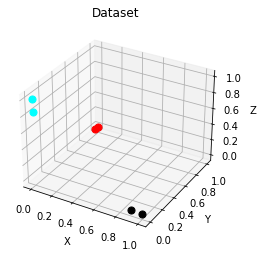

In [52]:
fig = plt.figure()
ax = plt.axes(projection='3d')

# plotting
colors = ["k", "r", "cyan"]
for i in range(Y.shape[0]):
    ax.scatter(X[i,0], X[i,1], X[i,2],
               s=50, c=colors[np.argmax(Y[i])])
ax.set_title('Dataset')
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.show()

To make the Neural Network, I will use the general code that I developed on the homework assignment. I'll attach the source file.

In [53]:
import nn
network = nn.NeuralNetwork(input_size=3, output_size=3, hidden_layer_sizes=[2],
                           activ_funcs=[nn.sigmoid, nn.softmax], loss_func=nn.loss_CCE,
                           random_initialize=True)

Initial Values of stuff:

In [54]:
display(Math("X = " + sy.latex(sy.Matrix(np.round(X,2)))))
display(Math("Y = " + sy.latex(sy.Matrix(np.round(Y,2)))))
display(Math("W1 = " + sy.latex(sy.Matrix(np.round(network.weights[0],4)))))
display(Math("W2 = " + sy.latex(sy.Matrix(np.round(network.weights[1],2)))))
display(Math("B = " + sy.latex(sy.Matrix(np.round(network.biases[0],2)))))
display(Math("C = " + sy.latex(sy.Matrix(np.round(network.biases[1],2)))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Now train the network for one epoch:

In [55]:
loss = network.train(X, Y, X_test=X, Y_test=Y, epochs=1, batch_size=6, lr=1)
pred = network.feed_forward(X)

Epoch 0 (out of 1) -- Loss: 1.5997


Print out desired information:

In [56]:
display(Math("Z1 = " + sy.latex(sy.Matrix(np.round(network.layers[0],2)))))
display(Math("H1 = " + sy.latex(sy.Matrix(np.round(network.activ_fns[0](network.layers[0]),2)))))
display(Math("Z2 = " + sy.latex(sy.Matrix(np.round(network.layers[1],2)))))
display(Math("\hat{Y} = " + sy.latex(sy.Matrix(np.round(pred,2)))))
display(Math("\hat{Y}-Y = " + sy.latex(sy.Matrix(np.round(pred - Y,2)))))


display(Math(r"\frac{dL}{dW1} (avg) = " + sy.latex(sy.Matrix(np.round(network.dLdw[0],4)))))
display(Math(r"\frac{dL}{dW2} (avg) = " + sy.latex(sy.Matrix(np.round(network.dLdw[1],2)))))
display(Math(r"\frac{dL}{dB} (avg) = " + sy.latex(sy.Matrix(np.round(network.dLdb[0],4)))))
display(Math(r"\frac{dL}{dC} (avg) = " + sy.latex(sy.Matrix(np.round(network.dLdb[1],2)))))

display(Math("L_{avg} = " + str(np.sum(network.loss_fn(Y, pred)))))

display(Math("W1_{new} = " + sy.latex(sy.Matrix(np.round(network.weights[0],4)))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>